# K-Means Clustering - Worldwide Happiness

## Introduction

The World Happiness Report is a publication of the United Nations Sustainable Development Solutions Network. It contains articles and rankings of national happiness, based on respondent ratings of their own lives, which the report also correlates with various life factors that describe life queality. As of March 2021, Finland had been ranked the happiest country in the world four times in a row.

The rankings of national happiness are based on a Cantril ladder survey. Nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. The report correlates the life evaluation results with various life factors.

## Objetive

We are going to train a unsupervise machine learning algorythm know as kmeans clustering with the objetive to cluster countries based on the features such as economic production, social support, life expentency, generosity, freedom to make life choices and perceived corruption. We should get a result showing the segmentation of the data set and rank those groups that will represent a life quality rank.

## Data

Data is collected from people in over 150 countries. Each variable measured reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries. 

* GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity
* Corruption perception

The report primarily uses data from the Gallup World Poll. Each annual report is available to the public to download on the World Happiness Report website in the following [link](https://worldhappiness.report/ed/2020/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from chart_studio.plotly import plot, iplot
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

df = pd.read_csv('WorldHap_Report.csv')
print('The dataset contains {} countries.'.format(len(df)))
df

The dataset contains 156 countries.


Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  
0         0.153                      0.393  
1         0.252                      0.410  
2         0.271                      0.341  
3         0.354                      0.118  
4         0.322                      0.298  
..          ...                        ...  
151       0.217                      0.411  
152       0.276                      0.147  
153       0.158                      0.025  
154       0.235                      0.035  
155       0.202                      0.091  

[156 rows x 9 columns]

Our dataset has a total of 156 countries with 6 measures. It seems tha we dont need to do many of data cleaning, so we are going to go ahead and explore the data and get some information about it.

## Exploratory Data Analysis

A good first step when we are going to explore a dataset and dont really have an idea of hat it contains is to get general information and see what type and how many values each column contains. We also want to see general statistics about the data set so we can see the range, mean and standart deviation for all columns. Finally we can look for null or duplicated values that otherwise may affect our final results.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [4]:
df.describe().T

count       mean        std    min       25%  \
Overall rank                  156.0  78.500000  45.177428  1.000  39.75000   
Score                         156.0   5.407096   1.113120  2.853   4.54450   
GDP per capita                156.0   0.905147   0.398389  0.000   0.60275   
Social support                156.0   1.208814   0.299191  0.000   1.05575   
Healthy life expectancy       156.0   0.725244   0.242124  0.000   0.54775   
Freedom to make life choices  156.0   0.392571   0.143289  0.000   0.30800   
Generosity                    156.0   0.184846   0.095254  0.000   0.10875   
Perceptions of corruption     156.0   0.110603   0.094538  0.000   0.04700   

                                  50%        75%      max  
Overall rank                  78.5000  117.25000  156.000  
Score                          5.3795    6.18450    7.769  
GDP per capita                 0.9600    1.23250    1.684  
Social support                 1.2715    1.45250    1.624  
Healthy life expectancy        0.7890    0.88175    1.141  
Freedom to make life choices   0.4170    0.50725    0.631  
Generosity                     0.1775    0.24825    0.566  
Perceptions of corruption      0.0855    0.14125    0.453

In [5]:
df.duplicated().sum()

0

These first steps can help us getting an idea of the dataset nature. Now that we know what we are working with lets compare the first and last rank in life happiness. Compare each measure adn try to figure out what are the most important features in our dataset.

In [6]:
df[df['Score']==7.769]

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769            1.34           1.587   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   

   Perceptions of corruption  
0                      0.393

In [7]:
df[df['Score']==2.853]

Overall rank Country or region  Score  GDP per capita  Social support  \
155           156       South Sudan  2.853           0.306           0.575   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
155                    0.295                          0.01       0.202   

     Perceptions of corruption  
155                      0.091

So far we have only see numbers, that may give us an idea of what is going on, however a visualization worths more than a thousand numbers (words), so lets get started and check out for some insights by using seaborn and get a pairplot. This plot is useful, because it gives us kind of a summary of all the different features or variables that we have in our dataframe versus each other.

<Figure size 1440x1440 with 0 Axes>

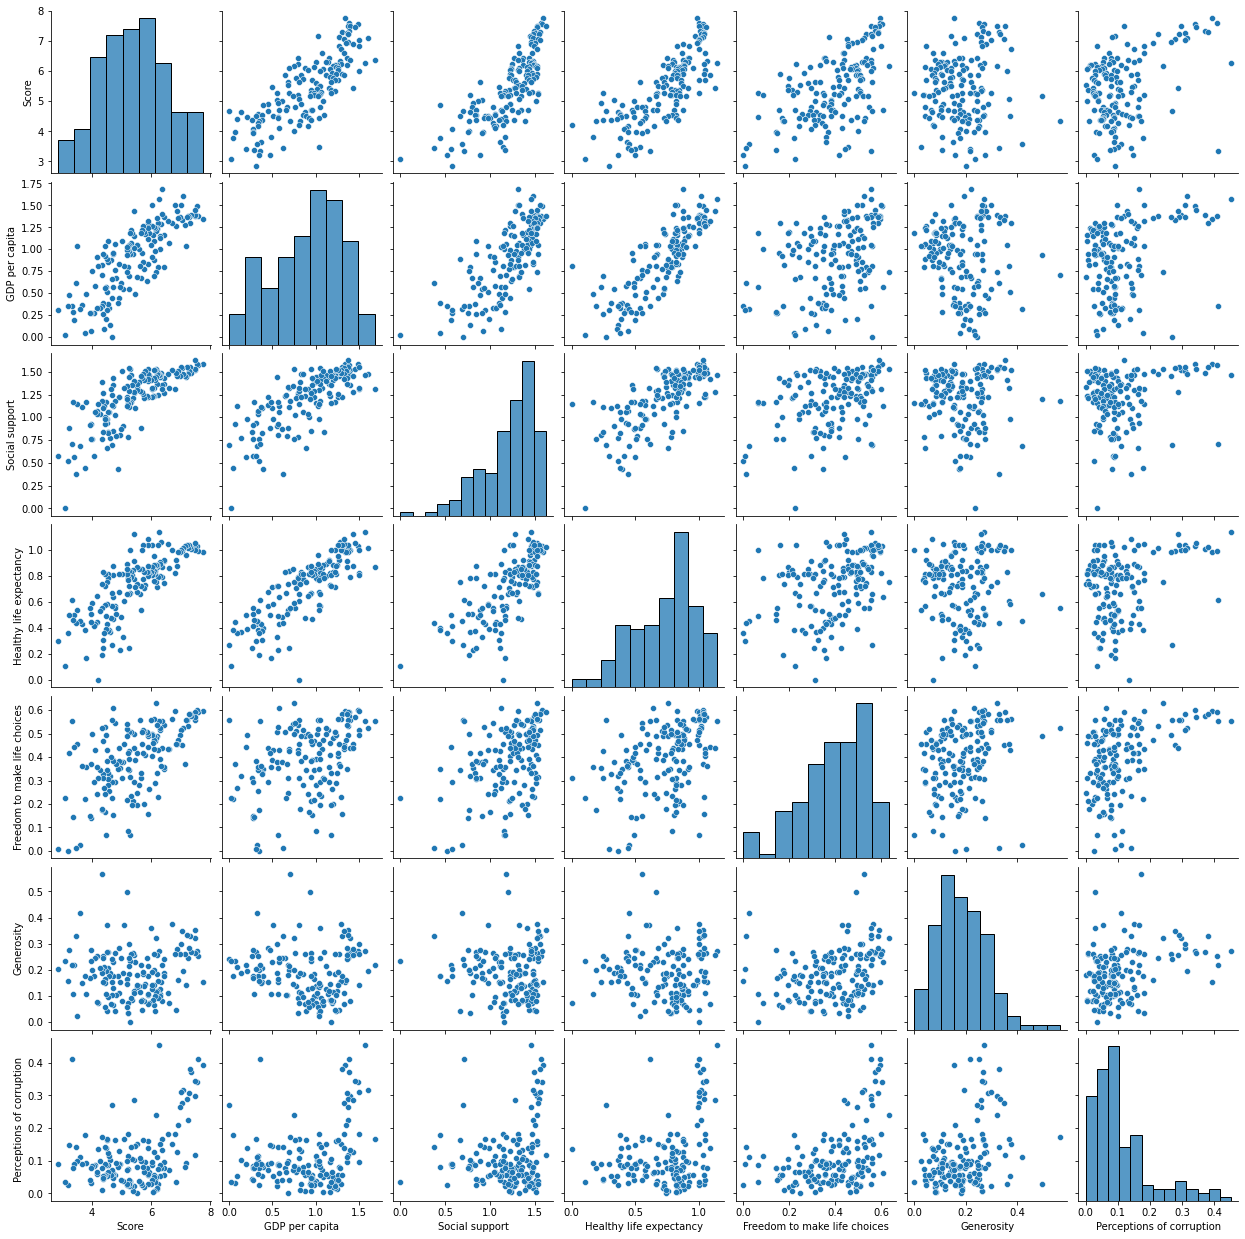

In [8]:
fig = plt.figure(figsize = (20,20))
sns.pairplot(df[['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]);

As you can see, we have all the different select features on the rows and in all the columns. No we can be aware if there is any correlation between our features. for example, it looks like there is a positive linear correlation between the Score and the GDP per Capita which makes sence as it grows domestic product, so as this production grows also jobs will increase, so people will be happier in general. This is reflected in quality life and its score. 

Other factor is the Healty life expectancy, as it increases the score increase too because as people live longer in a specific country, its happines increase too a consequetly its overall score.

The pair plot its a good start when looking after trends or correlation, but its not a final one. Next we are going to get histograms for each measure and a correlation matrix of the dataset.

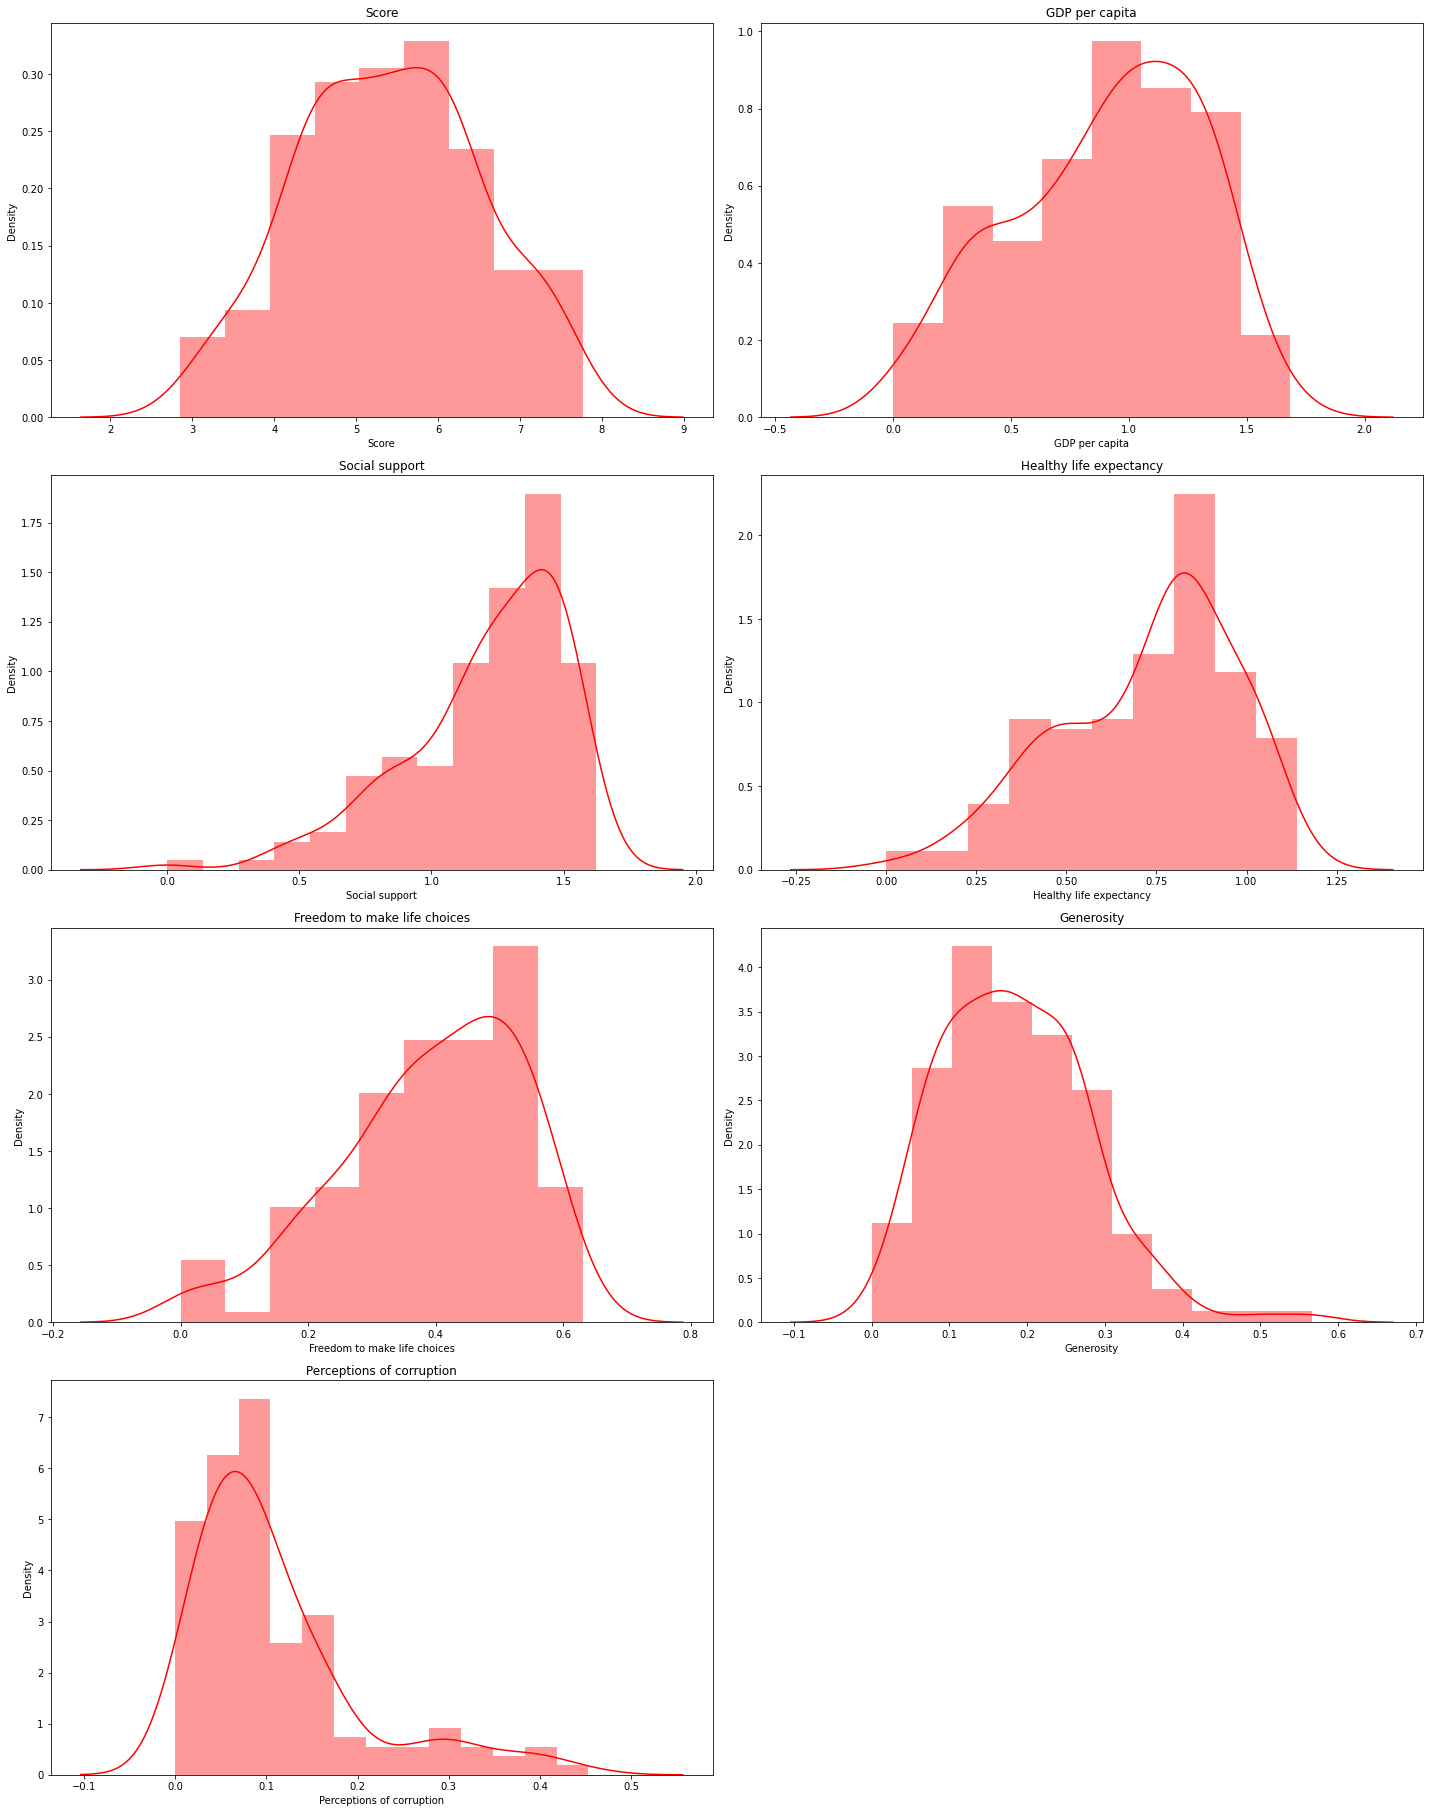

In [9]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
columns = ['Score','GDP per capita', 'Social support', 'Healthy life expectancy', 
    'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
plt.figure(figsize = (20, 50))
for i in range(len(columns)):
  plt.subplot(8, 2, i+1)
  sns.distplot(df[columns[i]], color = 'r');
  plt.title(columns[i])

plt.tight_layout()

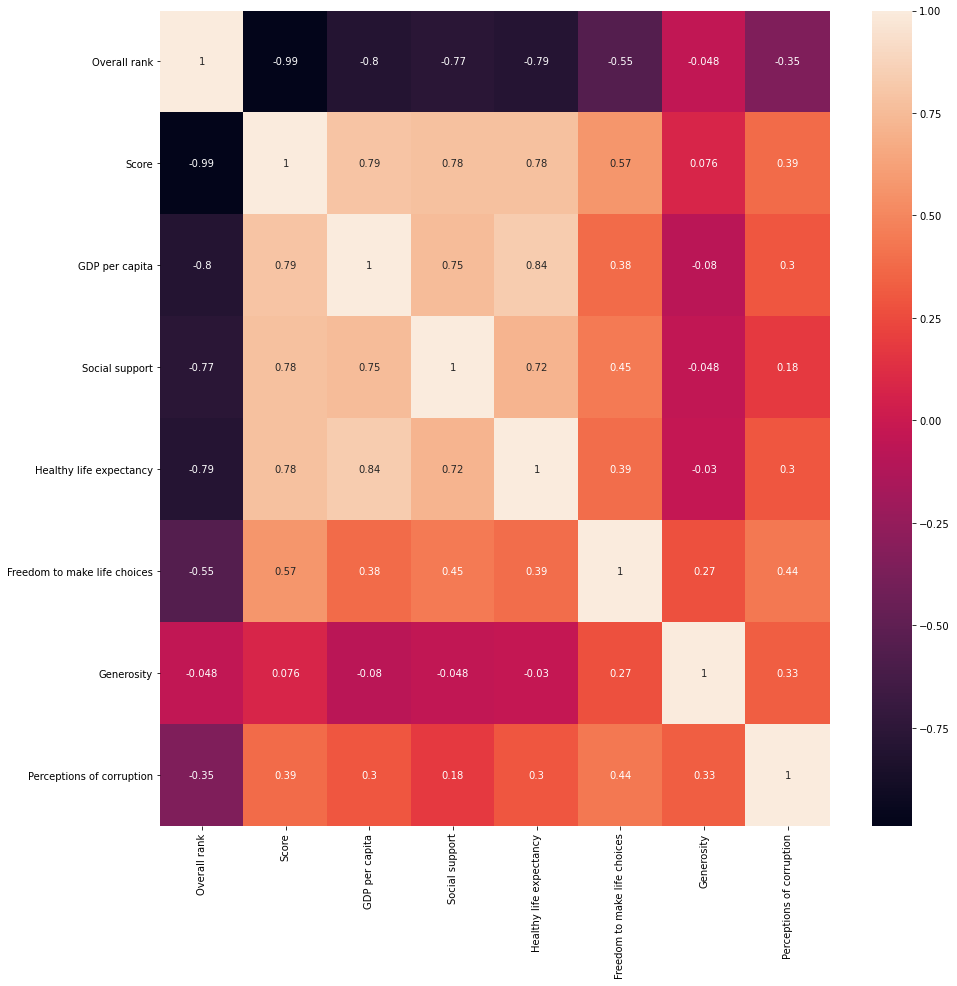

In [10]:
fig = plt.figure(figsize = (15,15))
c_matrix = df.corr()
sns.heatmap(c_matrix, annot=True);

The distribution plots show that countries with high scores have a low corruption perception index and high social support, GDP per capita and Freedom to make choices, however these ones are not so generous as developing countries. Al this is inverse in countries with low ranks.

The correlation matrix can be get by just using ".corr()", however using seaborn we can plot it and have a more appeling  and visual way of the matrix content. As you can see, every cell that has a light color indicates a high correlation, as it goes to -1 the features are negatively correlated. For example the GDP per capita and Score has a positive correlation of 0.79, we have the same case for Social Support and Healthy life expectancy.

By now we have get good insights and visualizations about our data, however its time to get more interactive. The goal is to see all the different countries spread in a chart where we can interact with it, so we can zoom in an get information just by hovering over them. LEts explore 3 features: GDP per capita, Freedom to make life choices and Healthy life expectancy and look out for trends.

In [11]:
fig = px.scatter(df, 
                 x= 'GDP per capita', 
                 y='Score', 
                 text='Country or region')
fig.update_layout(title_text = 'Happiness Score vs GDP per Capita')
fig.show()

In [12]:
fig = px.scatter(df, 
                 x = 'Freedom to make life choices', 
                 y = "Score",
                 text='Country or region',  
                 size = 'Overall rank', 
                 color = "Country or region", 
                 hover_name = "Country or region")

fig.update_layout(title_text = 'Happiness Score vs Freedom to make life choices')
fig.show()

We can add size to each data point, for this case as the size of the bubble increases, the overall rank of the country goes down. This way we can visually compare each country in the chart. 

In [13]:
fig = px.scatter(df, x = 'Healthy life expectancy', y = "Score", text='Country or region',
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Healthy life expectancy'
)
fig.show()

## Data Preprocessing

Prepare the data before chaining the kmeans clustering model. Since we are working with an unsupervise machine learning algorythm, we don't have a target class or a specific label, all we have its just a bunch of features that we are going to throw at the algorythm in order to segment the countries into different clusters or groups.

We are not going to use some of hte columns so we are going to just drop them. Next we have to scale our data.

In [14]:
df_seg = df.drop(columns=['Overall rank', 'Country or region', 'Score'])
scaler = StandardScaler()
scaled = scaler.fit_transform(df_seg)
scaled.shape

(156, 6)

## K-Means Clustering Algorithm

This algorithm works by grouping data points together (clustering) in an unsupervised fashion. The algorithm groups observations with similar attributes values togueter by measuring the euclidian distance between data points. For our case, since we dont have a tarject label, we want our model to learn on it's own how to group the countries by it's characteristics.
To this point we dont actually know in how many groups should we segmetn oue data so to find the optimal number of clusters we can use the elbow method.

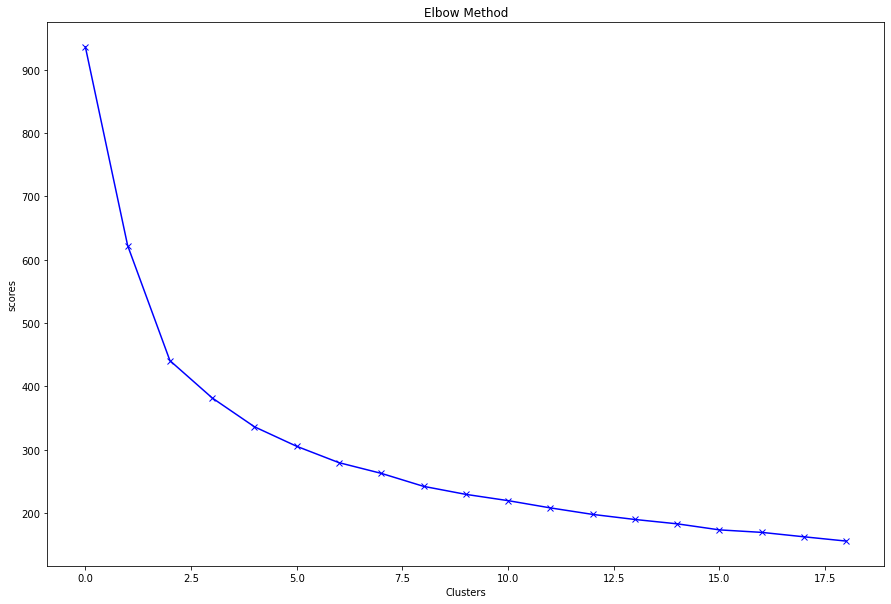

In [15]:
scores = []
range_values = range(1,20)
for i in range_values:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(scaled)
    scores.append(kmeans.inertia_)

plt.figure(figsize = (15, 10))
plt.plot(scores, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('scores') 
plt.show()

It looks like maby around three or four it comes saturated. This number can be subjective adn will depened on the criteria of each data scientist. Now we have defined we are going to build and train our model using k=3. We are using k for getting our centroids for each of our features and then rescale the data into the inverse transform to scale it back and make them have sense.

In [16]:
kmeans = KMeans(3)
kmeans.fit(scaled)

KMeans(n_clusters=3)

In [17]:
labels = kmeans.labels_
kmeans.cluster_centers_

array([[ 1.0440483 ,  0.84045675,  0.88671774,  1.04395863,  1.20151704,
         1.46865179],
       [ 0.35269748,  0.34811966,  0.39301953, -0.09193823, -0.55644773,
        -0.43733865],
       [-1.26422926, -1.1321435 , -1.24034126, -0.47156319,  0.26057036,
        -0.11435828]])

In [18]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_seg.columns])
centroids      

GDP per capita Social support Healthy life expectancy  \
0       1.044048       0.840457                0.886718   
1       0.352697       0.348120                0.393020   
2      -1.264229      -1.132144               -1.240341   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     1.043959   1.201517                  1.468652  
1                    -0.091938  -0.556448                 -0.437339  
2                    -0.471563   0.260570                 -0.114358

In [19]:
centroids = scaler.inverse_transform(centroids)
centroids = pd.DataFrame(data = centroids, columns = [df_seg.columns])
centroids

GDP per capita Social support Healthy life expectancy  \
0       1.319750       1.459464                0.939250   
1       1.045207       1.312634                0.820098   
2       0.403109       0.871174                0.425891   

  Freedom to make life choices Generosity Perceptions of corruption  
0                     0.541679   0.298929                  0.249000  
1                     0.379439   0.132012                  0.069390  
2                     0.325217   0.209587                  0.099826

Now we can have a glance of the centroids. For example for GDP per capita it looks like the algorithm has classified 156 countries into 3 clusters as follows:

* Cluster 0: Countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

* Cluster 1: Countries that have a medium GDP and high social support. These countries have medium life expectancy and high freedom to make life choices, also have low generosity and low perception of corruption.

* Cluster 2: Countries that have low GDP and average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

Right below we can see the labels predicted by the algorithm for each country and the complete dataframe that has already the labels included. 

In [20]:
y_kmeans = kmeans.fit_predict(scaled)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2])

In [21]:
clusters = pd.concat([df, pd.DataFrame({'cluster':labels})], axis = 1)
clusters

Overall rank         Country or region  Score  GDP per capita  \
0               1                   Finland  7.769           1.340   
1               2                   Denmark  7.600           1.383   
2               3                    Norway  7.554           1.488   
3               4                   Iceland  7.494           1.380   
4               5               Netherlands  7.488           1.396   
..            ...                       ...    ...             ...   
151           152                    Rwanda  3.334           0.359   
152           153                  Tanzania  3.231           0.476   
153           154               Afghanistan  3.203           0.350   
154           155  Central African Republic  3.083           0.026   
155           156               South Sudan  2.853           0.306   

     Social support  Healthy life expectancy  Freedom to make life choices  \
0             1.587                    0.986                         0.596   
1             1.573                    0.996                         0.592   
2             1.582                    1.028                         0.603   
3             1.624                    1.026                         0.591   
4             1.522                    0.999                         0.557   
..              ...                      ...                           ...   
151           0.711                    0.614                         0.555   
152           0.885                    0.499                         0.417   
153           0.517                    0.361                         0.000   
154           0.000                    0.105                         0.225   
155           0.575                    0.295                         0.010   

     Generosity  Perceptions of corruption  cluster  
0         0.153                      0.393        0  
1         0.252                      0.410        0  
2         0.271                      0.341        0  
3         0.354                      0.118        0  
4         0.322                      0.298        0  
..          ...                        ...      ...  
151       0.217                      0.411        2  
152       0.276                      0.147        2  
153       0.158                      0.025        2  
154       0.235                      0.035        2  
155       0.202                      0.091        2  

[156 rows x 10 columns]

## Cluster Analysis

Now that we already have our clusters we have to dive deep into the data and get some insigths. So we are going to make some visualizations that can help us understand the charactersitics of each cluster and how they compare from each other. 

Let's start by viewing the distribution for each cluster and each measure. Afterwards lets compare Happiness score and GDP per capita between each cluster, build some awesome 3D graphs to compare the models and finalize with a world map with the countries classification.

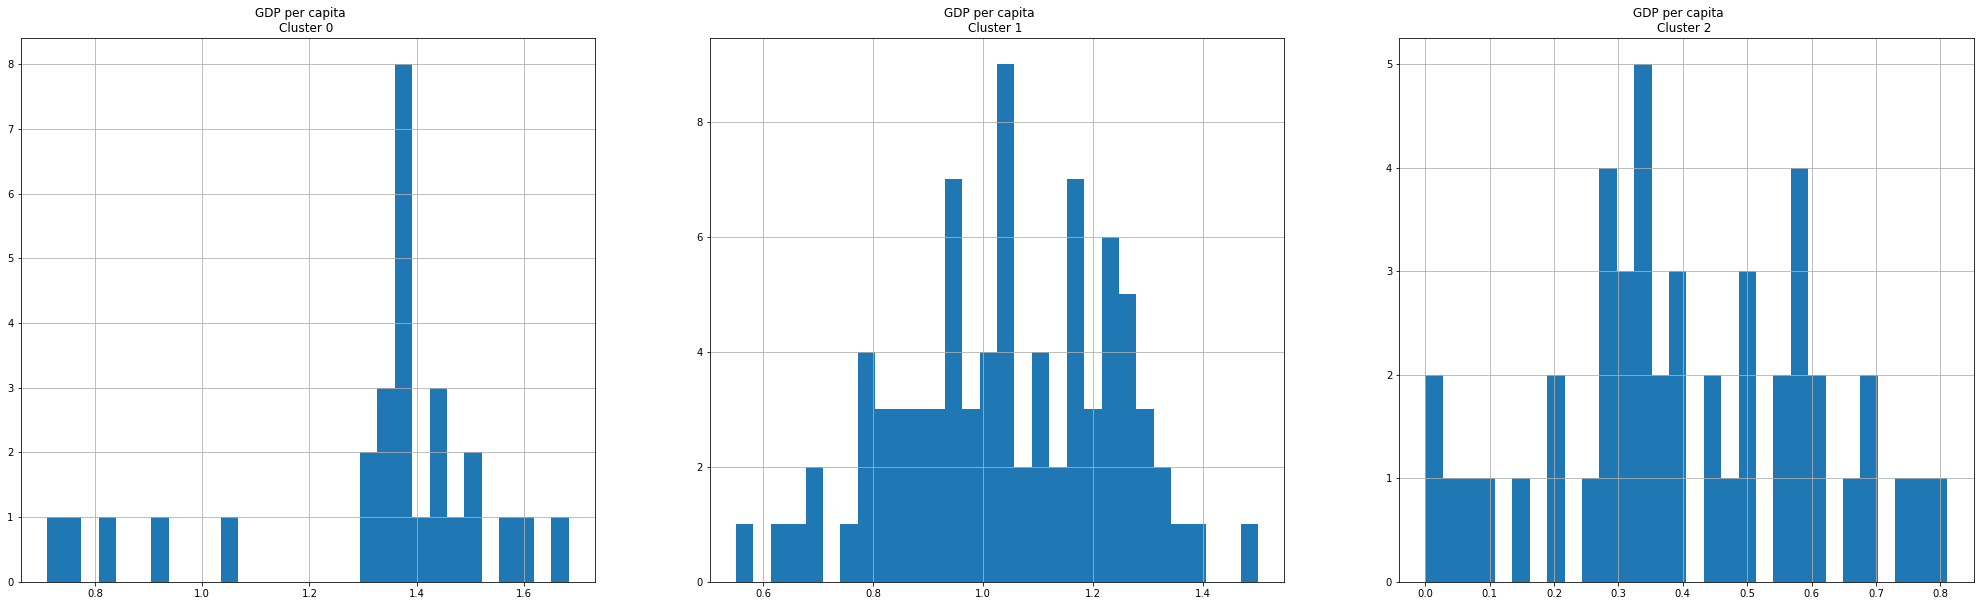

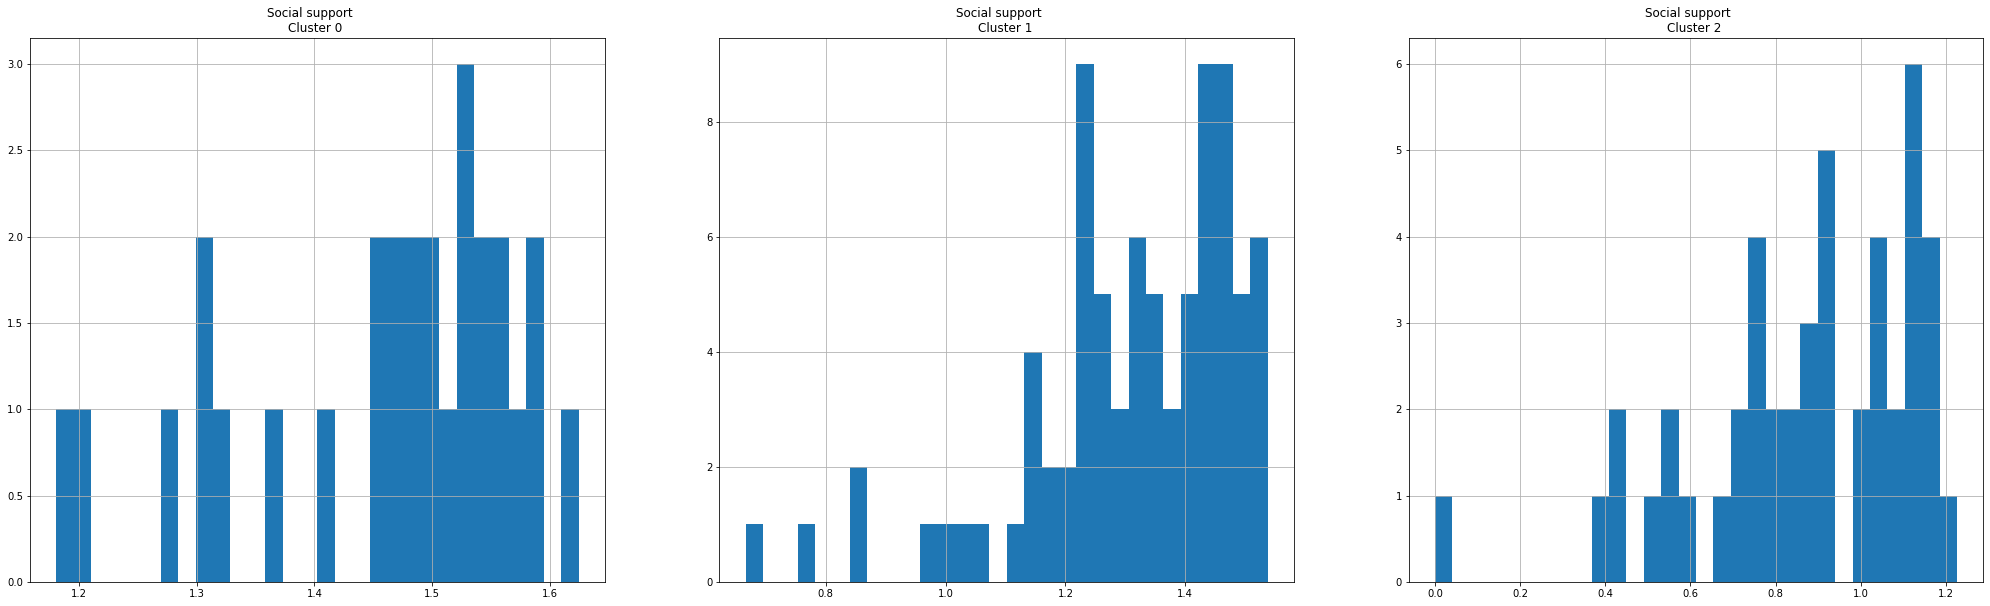

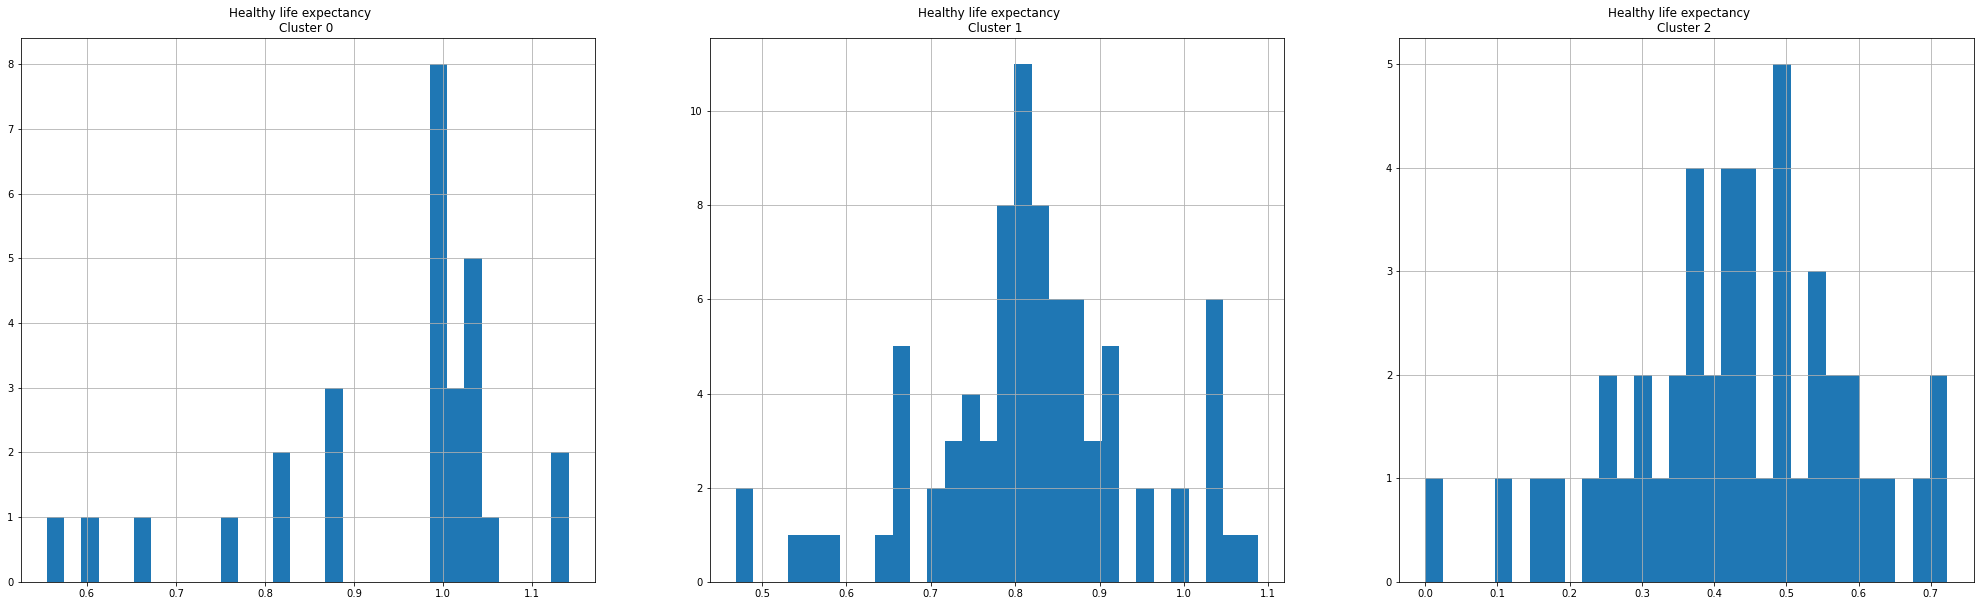

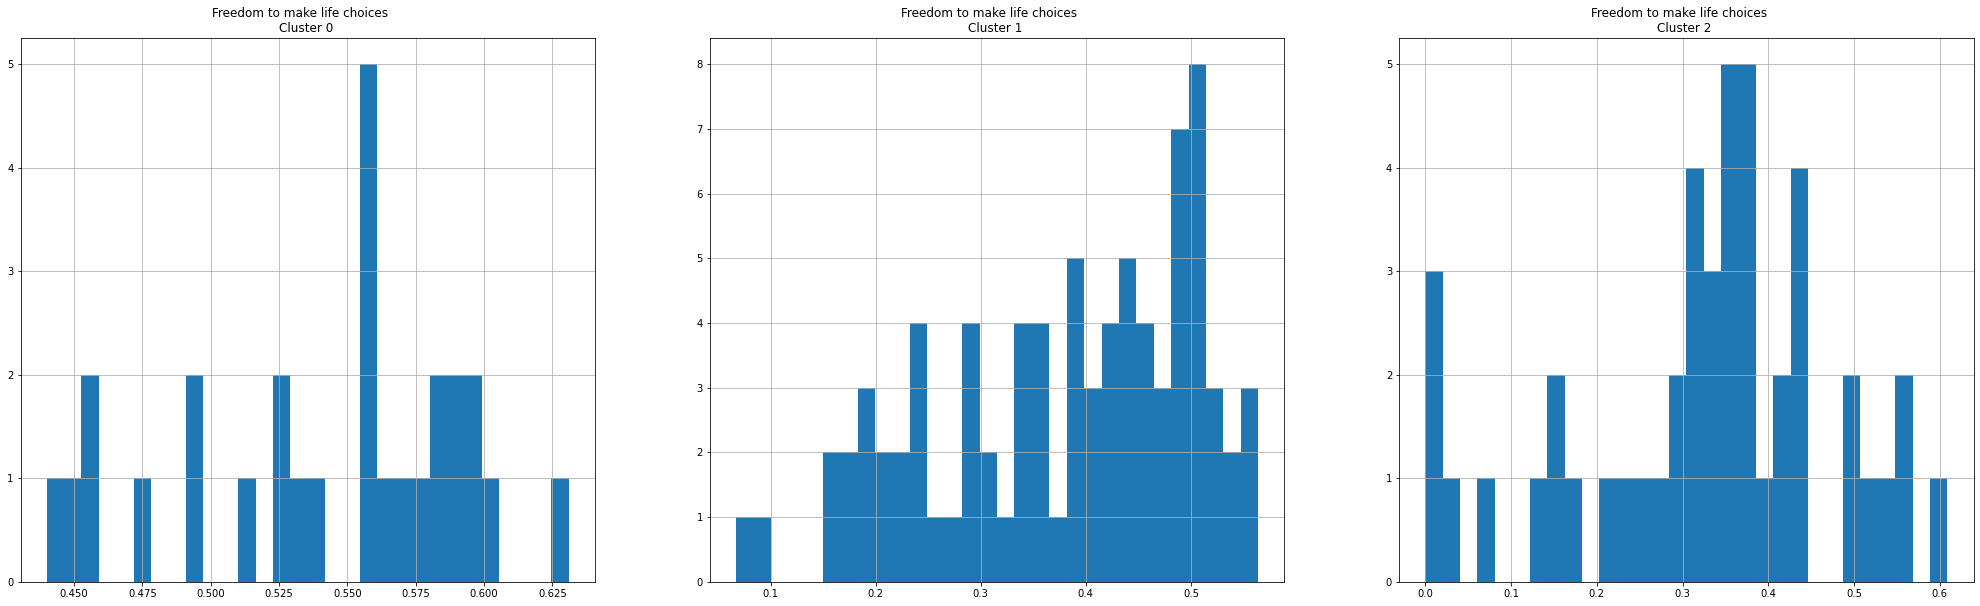

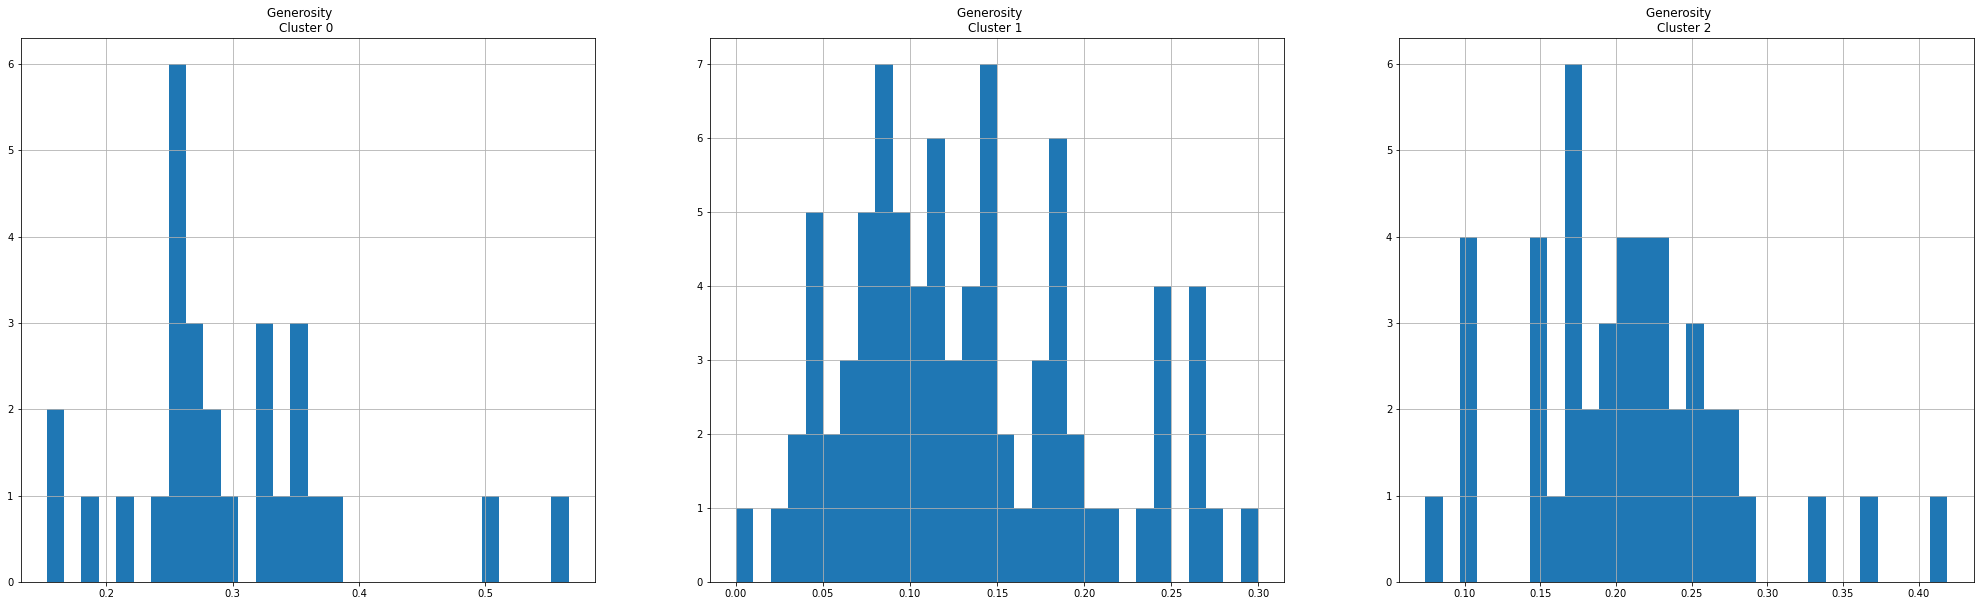

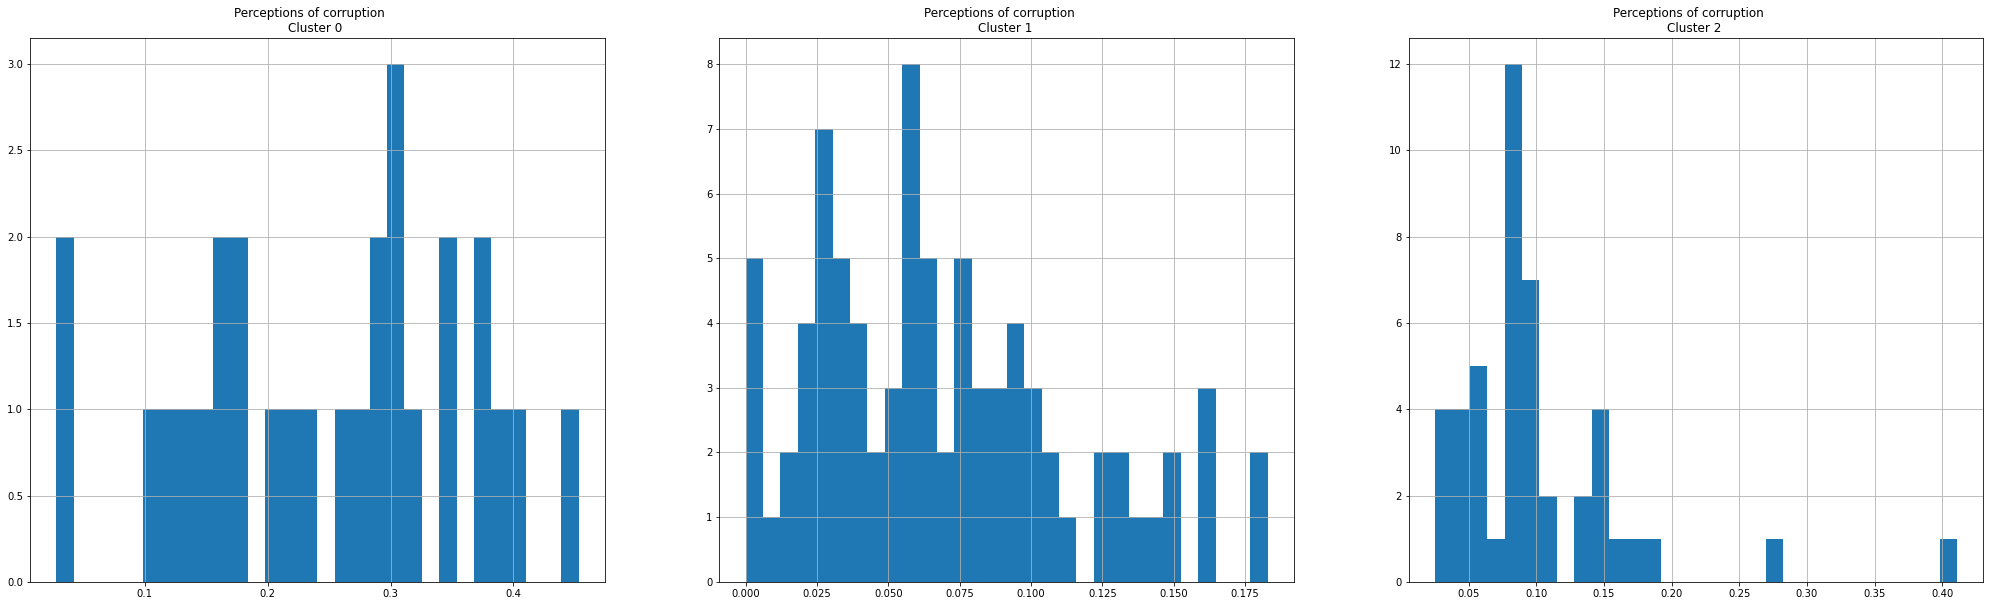

In [22]:
for i in df_seg.columns:
  plt.figure(figsize = (35, 10))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = clusters[clusters['cluster'] == j]
    cluster[i].hist(bins = 30)
    plt.title('{}    \nCluster {} '.format(i, j))
  
  plt.show()

In [23]:
fig = px.scatter(clusters, x = 'cluster', y = "Score",
           size = 'Overall rank', color = "Country or region", hover_name = "Country or region",
          trendline = "ols")

fig.update_layout(
    title_text = 'Happiness Score vs Cluster'
)
fig.show()

In [24]:
fig = px.scatter(clusters, 
                 x='cluster', 
                 y='GDP per capita',
                 size='Overall rank', 
                 color="Country or region", 
                 hover_name="Country or region",
                 trendline= "ols")

fig.update_layout(
    title_text='GDP per Capita vs Clusters'
)
fig.show()

In [25]:
from bubbly.bubbly import bubbleplot

figure = bubbleplot(dataset=clusters, 
                    x_column='GDP per capita', 
                    y_column='Perceptions of corruption', 
                    bubble_column='Country or region',  
                    color_column='cluster', 
                    z_column='Healthy life expectancy', 
                    size_column='Score',
                    x_title="GDP per capita", 
                    y_title="Corruption", 
                    z_title="Life Expectancy",
                    title='Clusters based EconomyImpact, Corruption and Life expectancy on Country Score',
                    colorbar_title='Cluster', marker_opacity=1, colorscale='Portland',
                    scale_bubble=0.8, 
                    height=650)

iplot(figure, config={'scrollzoom': True})

Here above we have plotted the GDP pe capita, Corrupution and Life expectancy in a 3D chart and now we can see with more detail the clusters we got and the country distribution. The algorithm was able to segment these different countries into 3 clusters, the red points represent the top ones which generally have the highest GDP per capita, the leastest indexes of corruption and high Life expectancy. On the other hand we have the yellow poits that represent lower GDP per capita and lower Life expectancy. There are also some countries that may have been misclassified.

We are going to follow the same process and do the same for Economy mpact, corruption and generosity, and finally a map of all the countries with their classes with a choropleth map where we will be able to get a sight of all the different countries with different color code for each cluster. 

In [26]:
figure = bubbleplot(dataset=clusters, 
                    x_column='GDP per capita', 
                    y_column='Perceptions of corruption', 
                    bubble_column='Country or region',  
                    color_column='cluster', 
                    z_column='Generosity', 
                    size_column='Score',
                    x_title="GDP per capita", 
                    y_title="Corruption", 
                    z_title="Life Expectancy",
                    title='Clusters based Impact of Economy, Corruption and Generosity on Country Score',
                    colorbar_title='Cluster', 
                    marker_opacity=1, 
                    colorscale='Portland',
                    scale_bubble=0.8, 
                    height=650)

iplot(figure, config={'scrollzoom': True})

In [27]:
data = dict(type = 'choropleth', 
           locations = clusters["Country or region"],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = clusters['cluster'], 
           text = clusters["Country or region"],
           colorbar = {'title':'Clusters'})

layout = dict(title = 'Clusters Geographical Visualization', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

## Conclusions and Recommendations

The data gatheres for this projects measures happiness and life satisfaction and provides a reasonably consistent and reliable picture of subjective well-being. There is some basic understanding among humans about what it means to be "happy". Survey-based measures of self-reported life satisfaction are informative about cross-country differences, even if these comparisons are noisy.

Thanks to machine learning, we were able to segment our data into clusters to group countries based on the features the data gave us: economic production, social support, life expentency, generosity, freedom to make life choices and perceived corruption. Now we can see and compare the differences of each cluster by looking at our awesome visualizations. 

In summary, we can gather following conclussions over he clusters:

* Cluster 0: Countries that have very high GDP, high social support and high life expectancy. These counties have high freedom to make life choices, medium generosity and medium perception of corruption.

* Cluster 1: Countries that have a medium GDP and high social support. These countries have medium life expectancy and high freedom to make life choices, also have low generosity and low perception of corruption.

* Cluster 2: Countries that have low GDP and average life expectancy and average social support. These counties have low freedom to make life choices, high generosity and medium perception of corruption.

For further work, I would recommend to build a multi linear regression model to get to know the influence each measure has over the overall score of each country.